In [1]:
import skimage
import os
import cv2
import glob
import numpy as np
test_dir = ".\\data\\ffhq\\generated_img\\original256\\"
baseline_dir = ".\\data\\ffhq\\generated_img\\BL_epoch_268\\"
cascade_dir = ".\\data\\ffhq\\generated_img\\SS_FS_109\\"

def sort_by_number_ending(lst): # credit chatGPT
    return sorted(lst, key=lambda x: int(x[:-4].split("-")[-1]))
original_imgs = sort_by_number_ending(glob.glob(os.path.join(test_dir, "origin*.png")))
baseline_imgs = sort_by_number_ending(os.listdir(baseline_dir)) # BL: Basline (32->256)
cascade_imgs = sort_by_number_ending(os.listdir(cascade_dir)) # SS: Second stage
# skimage.measure.compare_psnr(*im_true*, *im_test*, *data_range=None*)

# skimage.measure.compare_ssim(X, Y, win_size=None, gradient=False, data_range=None, multichannel=False, gaussian_weights=False, full=False, **kwargs)

In [2]:
# Calculate BL PSNR and SSIM
psnrs_BL = np.array([])
ssims_BL = np.array([])
for idx, img in enumerate(original_imgs):
    input_img_path = img
    test_img_path = os.path.join(baseline_dir, baseline_imgs[idx])
    # print(input_img_path)
    # print(test_img_path)
    input_img = cv2.imread(input_img_path)
    input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    psnr = skimage.metrics.peak_signal_noise_ratio(input_img, test_img, data_range=255)
    psnrs_BL = np.append(psnrs_BL, psnr)
    ssim = skimage.metrics.structural_similarity(input_img, test_img, data_range=255, multichannel=True)
    ssims_BL = np.append(ssims_BL, ssim)
print("Average of psnrs in Original 32->256 is", np.average(psnrs_BL))
print("Stadard Deviation of psnrs in Original 32->256 is", np.std(psnrs_BL))
print("Average of ssims in Original 32->256 is", np.average(ssims_BL))
print("Stadard Deviation of ssims in Original 32->256 is", np.std(ssims_BL))

C:\Users\cj020\AppData\Local\Temp\ipykernel_34284\3278122466.py:15: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim = skimage.metrics.structural_similarity(input_img, test_img, data_range=255, multichannel=True)


Average of psnrs in Original 32->256 is 20.84080674088172
Stadard Deviation of psnrs in Original 32->256 is 2.135939950760935
Average of ssims in Original 32->256 is 0.5865701354054501
Stadard Deviation of ssims in Original 32->256 is 0.08222583323533914


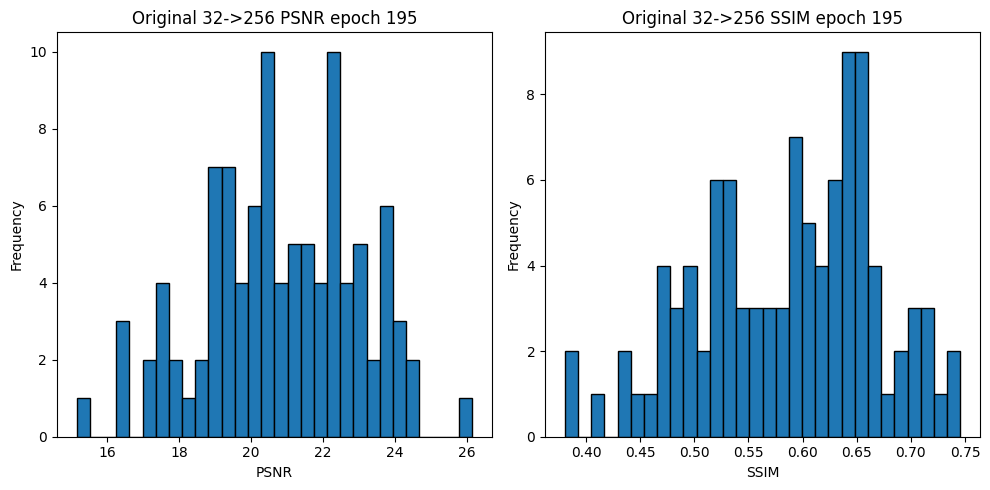

Average of psnrs in Original 32->256 is 20.84080674088172
Stadard Deviation of psnrs in Original 32->256 is 2.135939950760935
Average of ssims in Original 32->256 is 0.5865701354054501
Stadard Deviation of ssims in Original 32->256 is 0.08222583323533914


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# generate data for histogram
# data = np.random.normal(100, 20, 1000)

# create the subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# plot the first histogram
ax[0].hist(psnrs_BL, bins=30, edgecolor='black')
ax[0].set_xlabel('PSNR')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Original 32->256 PSNR epoch 195')

# plot the second histogram
ax[1].hist(ssims_BL, bins=30, edgecolor='black')
ax[1].set_xlabel('SSIM')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Original 32->256 SSIM epoch 195')

# adjust spacing between subplots
fig.tight_layout()

# display plot
plt.show()
print("Average of psnrs in Original 32->256 is", np.average(psnrs_BL))
print("Stadard Deviation of psnrs in Original 32->256 is", np.std(psnrs_BL))
print("Average of ssims in Original 32->256 is", np.average(ssims_BL))
print("Stadard Deviation of ssims in Original 32->256 is", np.std(ssims_BL))

In [4]:
# Calculate SS PSNR and SSIM
# Calculate BL PSNR and SSIM
psnrs_CC = np.array([])
ssims_CC = np.array([])
for idx, img in enumerate(original_imgs):
    input_img_path = img
    test_img_path = os.path.join(cascade_dir, cascade_imgs[idx])
    # print(input_img_path)
    # print(test_img_path)
    input_img = cv2.imread(input_img_path)
    input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    psnr = skimage.metrics.peak_signal_noise_ratio(input_img, test_img, data_range=255)
    psnrs_CC = np.append(psnrs_CC, psnr)
    ssim = skimage.metrics.structural_similarity(input_img, test_img, data_range=255, multichannel=True)
    ssims_CC = np.append(ssims_CC, ssim)
    print(psnr, ssim)
print("Average of psnrs in cascade 32->256 is", np.average(psnrs_CC))
print("Average of ssims in cascade 32->256 is", np.average(ssims_CC))

20.440246780221948 0.533321847112699
21.94168423884202 0.5137297355199862
19.854396838874163 0.626735470853464
21.458706205364813 0.6761537235369363
17.291901073065144 0.5182437890426864
23.299503693419968 0.6829632077327155
16.752550615903505 0.44962234246509786


C:\Users\cj020\AppData\Local\Temp\ipykernel_34284\327087053.py:16: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim = skimage.metrics.structural_similarity(input_img, test_img, data_range=255, multichannel=True)


17.55992787589359 0.47618242114716997
21.512339699120613 0.571666776626974
20.618180631392136 0.6620821774142279
22.927548874299948 0.6455781863212448
21.97132181195174 0.6419155939916767
18.721326458951445 0.5699973014544228
21.660836088194312 0.6863273380087312
23.551256907942776 0.6940936993734169
20.411600226263687 0.5947861871416891
21.155188555489563 0.5570521934736224
18.77950702760058 0.5412067585425985
20.470624232975624 0.5957031869538574
18.395585789043803 0.6055440582675419
20.38220458686881 0.7149684681118892
22.856993151521223 0.7150905478213186
21.812321217714636 0.6215804563454895
22.486654957759878 0.6046009425742206
20.416030566996334 0.634512532335422
23.34535683651421 0.6548163010802442
23.355915548811762 0.7278570838876957
19.391872857998976 0.5807592500769786
22.367883483207592 0.6357633195437685
20.71733689837824 0.5608555995306199
18.78599835766498 0.6185932665689187
19.53265248361365 0.49393683537437044
20.159980085111062 0.6143871788553117
19.749916877798142 0

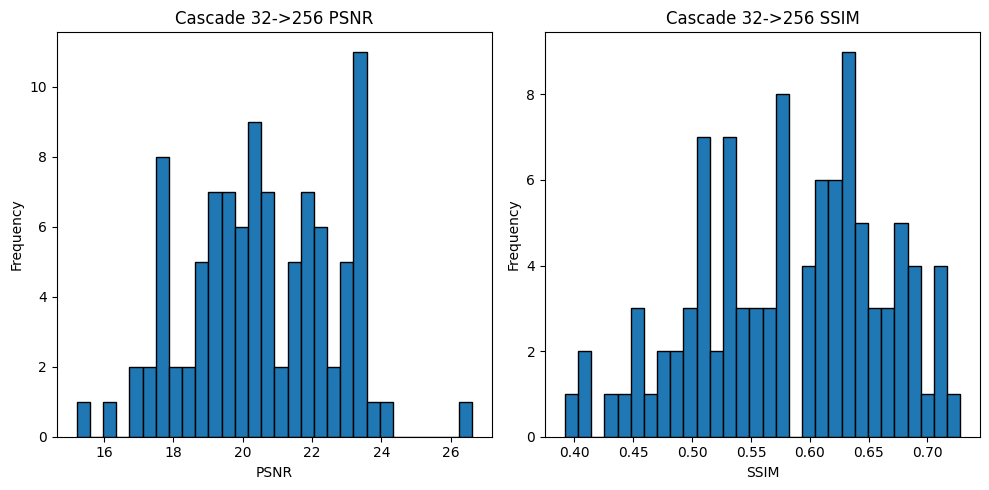

Average of psnrs in cascade 32->256 is 20.56126277077401
Stadard Deviation of psnrs in cascade 32->256 is 2.089283612255339
Average of ssims in cascade 32->256 is 0.5832549682095766
Stadard Deviation of ssims in cascade 32->256 is 0.07903086345971493


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# generate data for histogram
# data = np.random.normal(100, 20, 1000)

# create the subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# plot the first histogram
ax[0].hist(psnrs_CC, bins=30, edgecolor='black')
ax[0].set_xlabel('PSNR')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Cascade 32->256 PSNR')

# plot the second histogram
ax[1].hist(ssims_CC, bins=30, edgecolor='black')
ax[1].set_xlabel('SSIM')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Cascade 32->256 SSIM')

# adjust spacing between subplots
fig.tight_layout()

# display plot
plt.show()
print("Average of psnrs in cascade 32->256 is", np.average(psnrs_CC))
print("Stadard Deviation of psnrs in cascade 32->256 is", np.std(psnrs_CC))
print("Average of ssims in cascade 32->256 is", np.average(ssims_CC))
print("Stadard Deviation of ssims in cascade 32->256 is", np.std(ssims_CC))

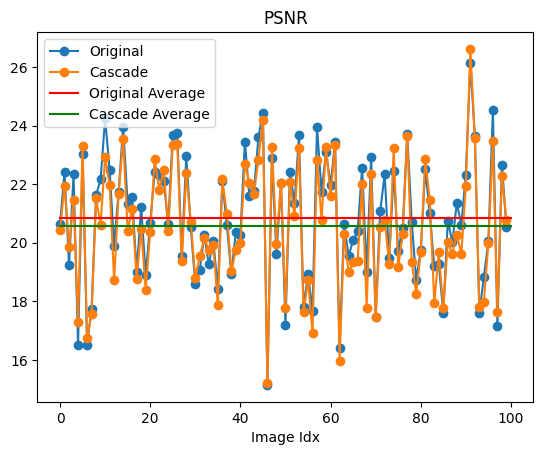

In [6]:
plt.plot(psnrs_BL, label='Original', marker = 'o')
plt.plot(psnrs_CC, label='Cascade', marker = 'o')
plt.plot([0, 100], [np.average(psnrs_BL), np.average(psnrs_BL)], label='Original Average', color = "r")
plt.plot([0, 100], [np.average(psnrs_CC), np.average(psnrs_CC)], label='Cascade Average', color = "g")
plt.legend()
plt.title('PSNR')
plt.xlabel("Image Idx")
plt.show()

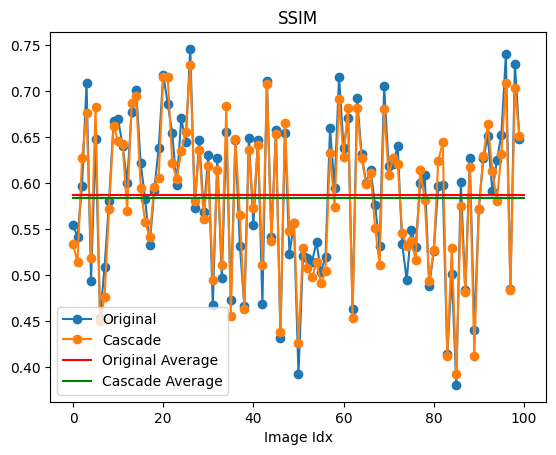

In [7]:
plt.plot(ssims_BL, label='Original', marker = 'o')
plt.plot(ssims_CC, label='Cascade', marker = 'o')
plt.plot([0, 100], [np.average(ssims_BL), np.average(ssims_BL)], label='Original Average', color = "r")
plt.plot([0, 100], [np.average(ssims_CC), np.average(ssims_CC)], label='Cascade Average', color = "g")
plt.legend()
plt.title('SSIM')
plt.xlabel("Image Idx")
plt.show()

# Helper for visualizations (horizontal comparison of images)


In [ ]:
# concatenate images for original, baseline, and concatenate horizontally using cv2 and save the result
import cv2
import os
import glob
import numpy as np
